In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings(action='ignore')

from termcolor import colored

In [3]:
#pandas의 read_csv 함수를 사용하여 데이터를 불러옴
moldset_labeled = pd.read_csv('./dataset/moldset_labeled.csv', low_memory=False, index_col=0)

In [4]:
#pandas dataframe의 value_counts 함수를 사용
moldset_labeled['EQUIP_NAME'].value_counts()  #결과는 아래에서 확인 가능하다.

650톤-우진2호기    2607
Name: EQUIP_NAME, dtype: int64

In [5]:
#분석에 사용되는 제품 코드
parts = ['86141AA000', '86131AA000', '86141T1000', '86131T1000']
moldset_labeled['PART_NO'].value_counts()  #결과는 아래에서 확인 가능하다.

86141AA000    713
86131AA000    712
86131T1000    591
86141T1000    591
Name: PART_NO, dtype: int64

In [6]:
#dataframe 이름을 사용
moldset_labeled.head() #결과는 아래에서 확인 가능하다.

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,...,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,...,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
moldset_labeled_cn7 = pd.read_csv("./dataset/moldset_labeled_cn7.csv",index_col=0)
moldset_labeled_rg3 = pd.read_csv("./dataset/moldset_labeled_rg3.csv",index_col=0)
moldset_unlabeled_cn7 = pd.read_csv("./dataset/moldset_unlabeled_cn7.csv",index_col=0)
moldset_unlabeled_rg3 = pd.read_csv("./dataset/moldset_unlabeled_rg3.csv",index_col=0)
print(colored("moldset_labeled_cn7.shape \t:", "red"), moldset_labeled_cn7.shape)
print(colored("moldset_labeled_rg3.shape \t:", "red"), moldset_labeled_rg3.shape)
print(colored("moldset_unlabeled_cn7.shape \t:", "red"), moldset_unlabeled_cn7.shape)
print(colored("moldset_unlabeled_rg3.shape \t:", "red"), moldset_unlabeled_rg3.shape)

moldset_labeled_cn7.shape 	: (1211, 25)
moldset_labeled_rg3.shape 	: (1182, 25)
moldset_unlabeled_cn7.shape 	: (35239, 24)
moldset_unlabeled_rg3.shape 	: (35941, 24)


<AxesSubplot:>

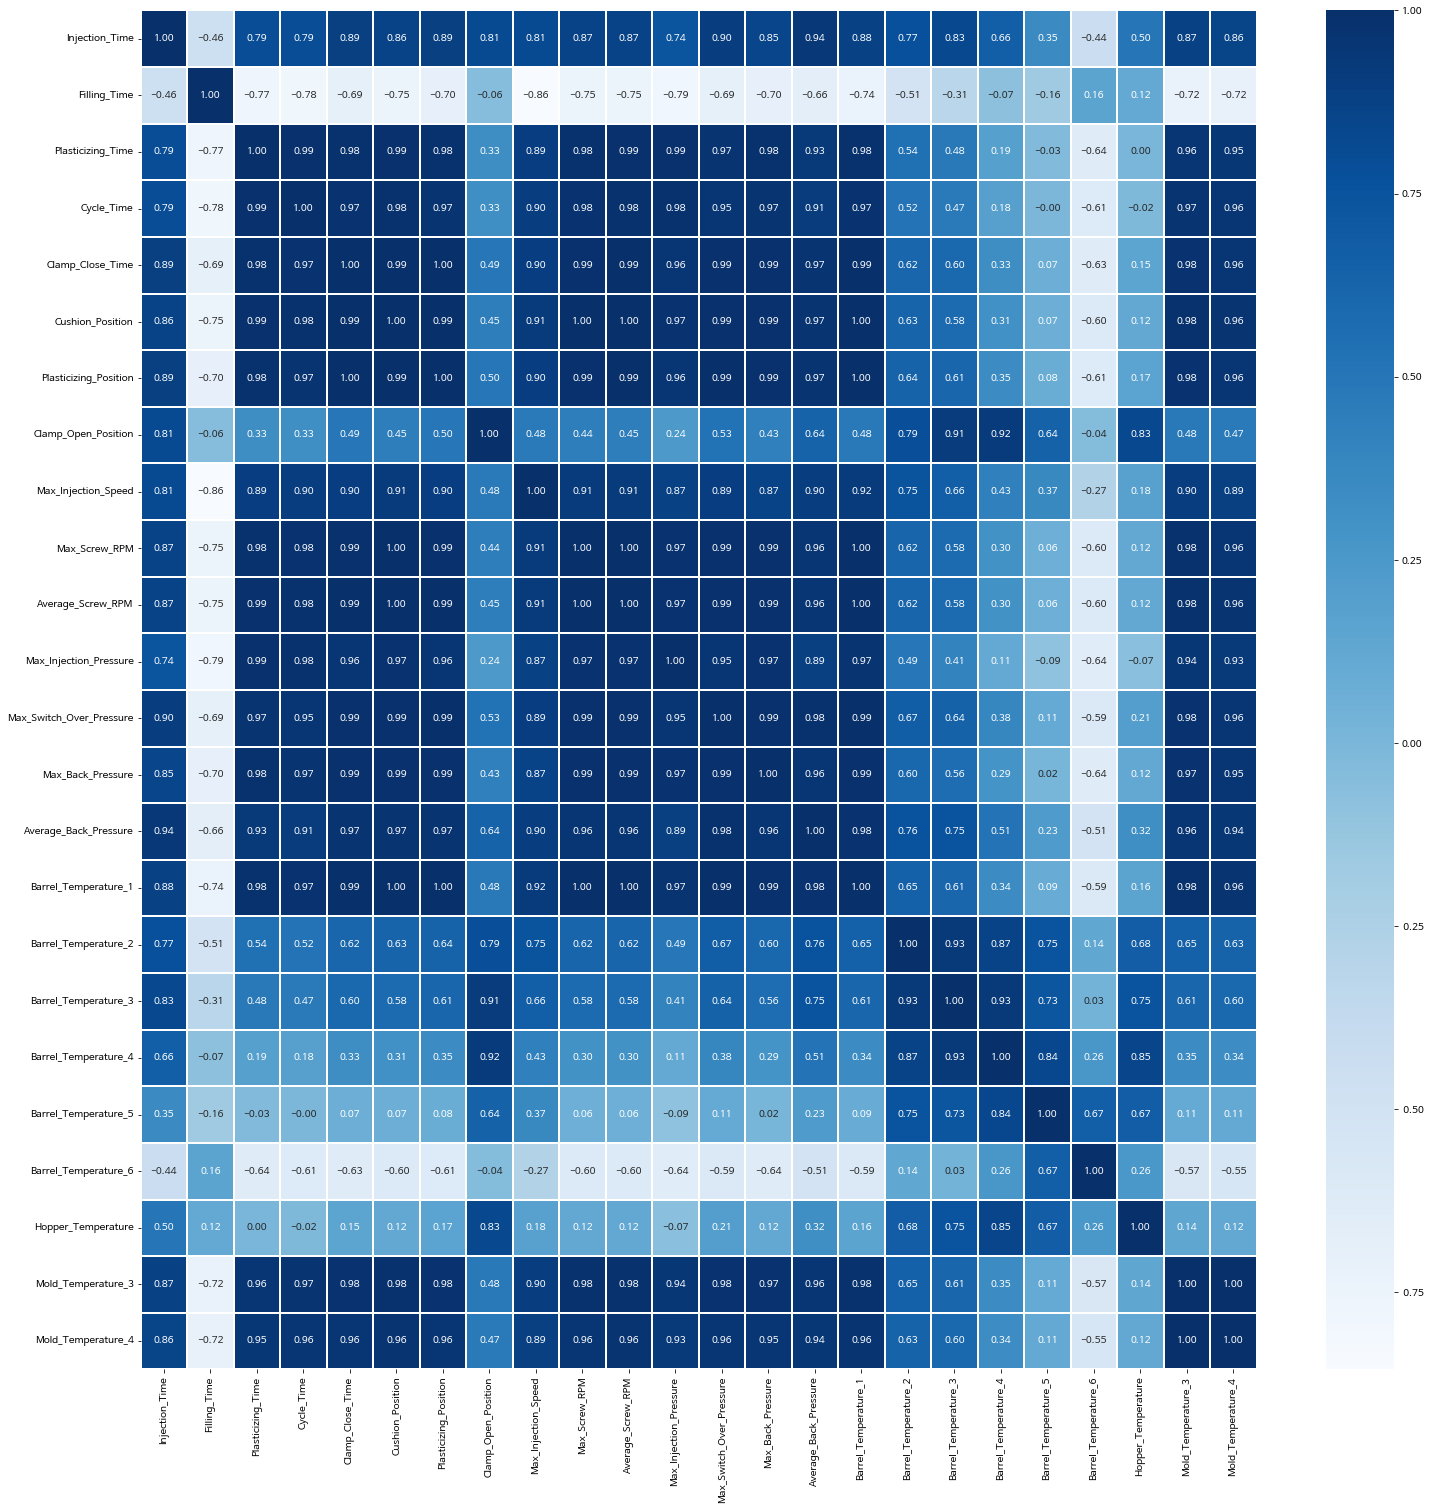

In [24]:
import seaborn as sns

plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_cn7.corr(), linewidths=0.1,annot=True, fmt ='.2f', cmap='Blues')
 #결과는 아래에서 확인 가능하다.

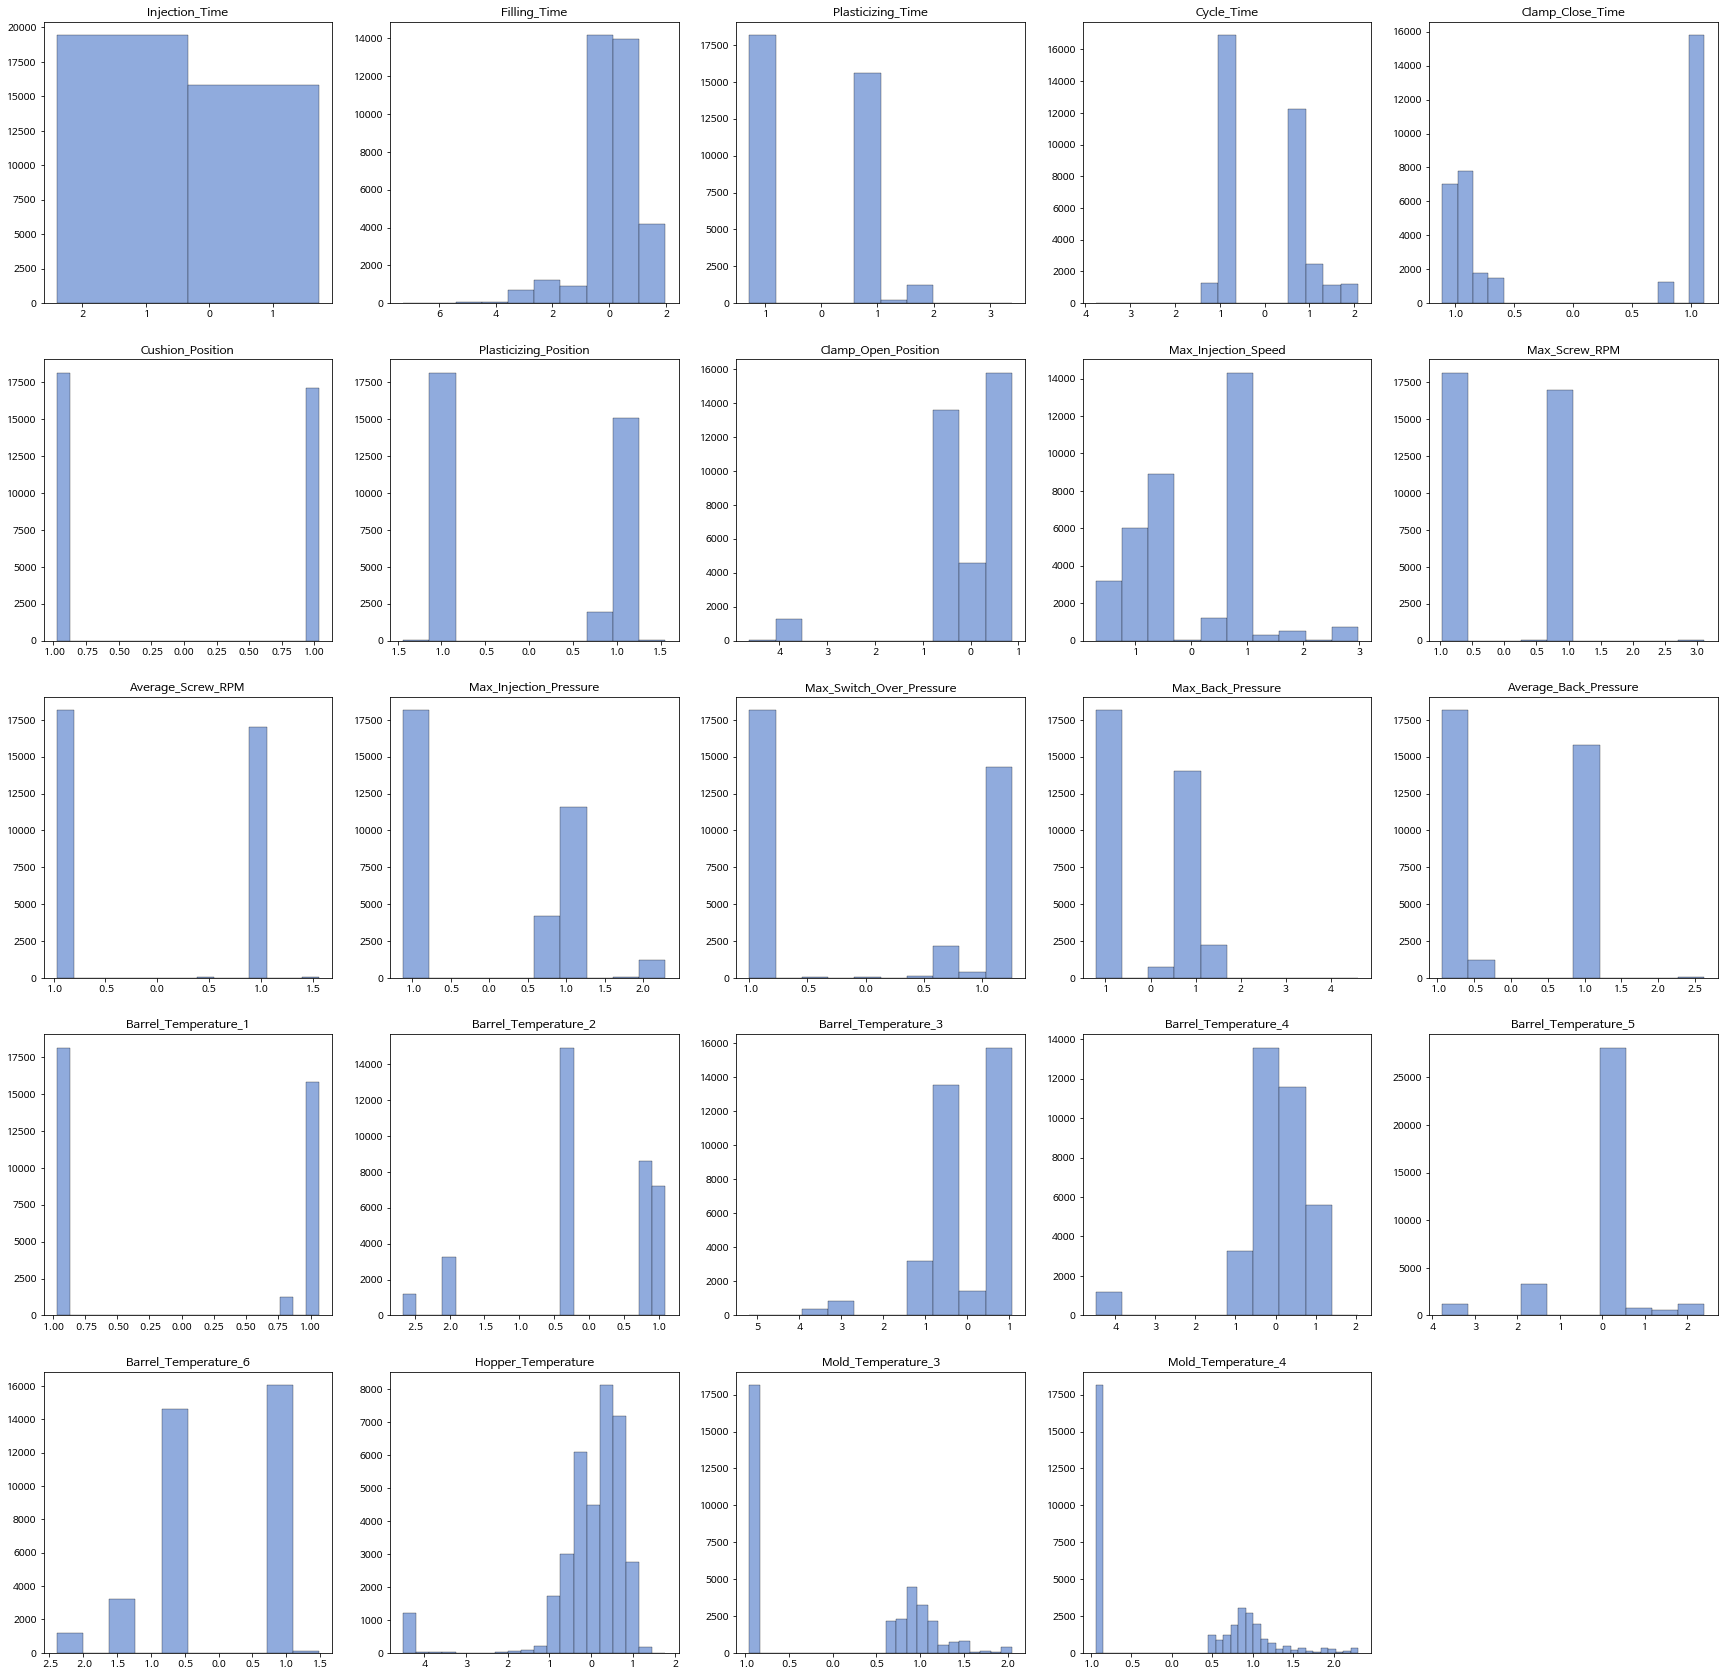

In [25]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(moldset_unlabeled_cn7):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(moldset_unlabeled_cn7[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value) #결과는 아래에서 확인 가능하다.

In [26]:
moldset_unlabeled_rg3.describe() #결과는 아래에서 확인 가능하다.

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,...,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04,3.594100e+04
mean,-6.271733e-15,-1.273841e-13,-3.998550e-14,7.825293e-14,-2.968289e-14,2.944997e-14,-3.527742e-15,2.159240e-14,2.021960e-14,-7.052946e-14,...,-2.728350e-14,-1.229644e-14,-4.702346e-16,7.551982e-15,-1.179495e-14,1.112713e-15,-3.177128e-14,3.821971e-15,3.598810e-14,6.401599e-14
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.150729e+00,-1.307632e+00,-1.534163e+00,-4.267867e+00,-1.634201e+00,-1.376216e+00,-1.937893e+00,-8.177855e-01,-2.131025e+00,-1.179145e+00,...,-1.154268e+00,-1.310547e+00,-2.265640e+00,-3.300413e+00,-3.088650e+00,-3.055941e+00,-3.301524e+00,-2.478812e+00,-1.276966e+00,-1.225083e+00
25%,-8.278799e-01,-8.472138e-01,-1.131352e+00,-1.205973e+00,-1.262902e+00,-1.315176e+00,-1.026514e+00,-8.068068e-01,-1.169414e+00,-1.179145e+00,...,-1.154268e+00,-1.310547e+00,-6.746798e-01,-4.035765e-01,6.774329e-02,2.969084e-02,-1.468692e-01,-1.281683e-02,-1.276966e+00,-1.225083e+00
50%,-8.243707e-01,-8.422631e-01,4.702237e-01,6.067004e-01,7.792383e-01,7.593573e-01,5.132709e-01,-7.984580e-01,9.052633e-01,5.111913e-01,...,6.129576e-01,8.049587e-01,8.467720e-01,7.911640e-01,5.406882e-01,5.763579e-01,-8.501317e-02,3.480604e-01,5.268342e-01,4.242649e-01
75%,5.582666e-01,1.167735e+00,5.056711e-01,7.526927e-01,8.039916e-01,7.594553e-01,6.407366e-01,1.236024e+00,9.341116e-01,5.166794e-01,...,6.886093e-01,8.116369e-01,8.931106e-01,8.402629e-01,6.332209e-01,6.613950e-01,9.046825e-01,6.387671e-01,6.836864e-01,5.654253e-01
max,2.800666e+00,1.662808e+00,4.638510e+00,1.744652e+00,5.977415e+00,7.623277e-01,3.085528e+00,1.916411e+00,9.653640e-01,2.272873e+00,...,2.961188e+00,8.235093e-01,1.016680e+00,9.220945e-01,9.211004e-01,8.922099e-01,1.131488e+00,1.330449e+00,1.755510e+00,2.185055e+00


<AxesSubplot:>

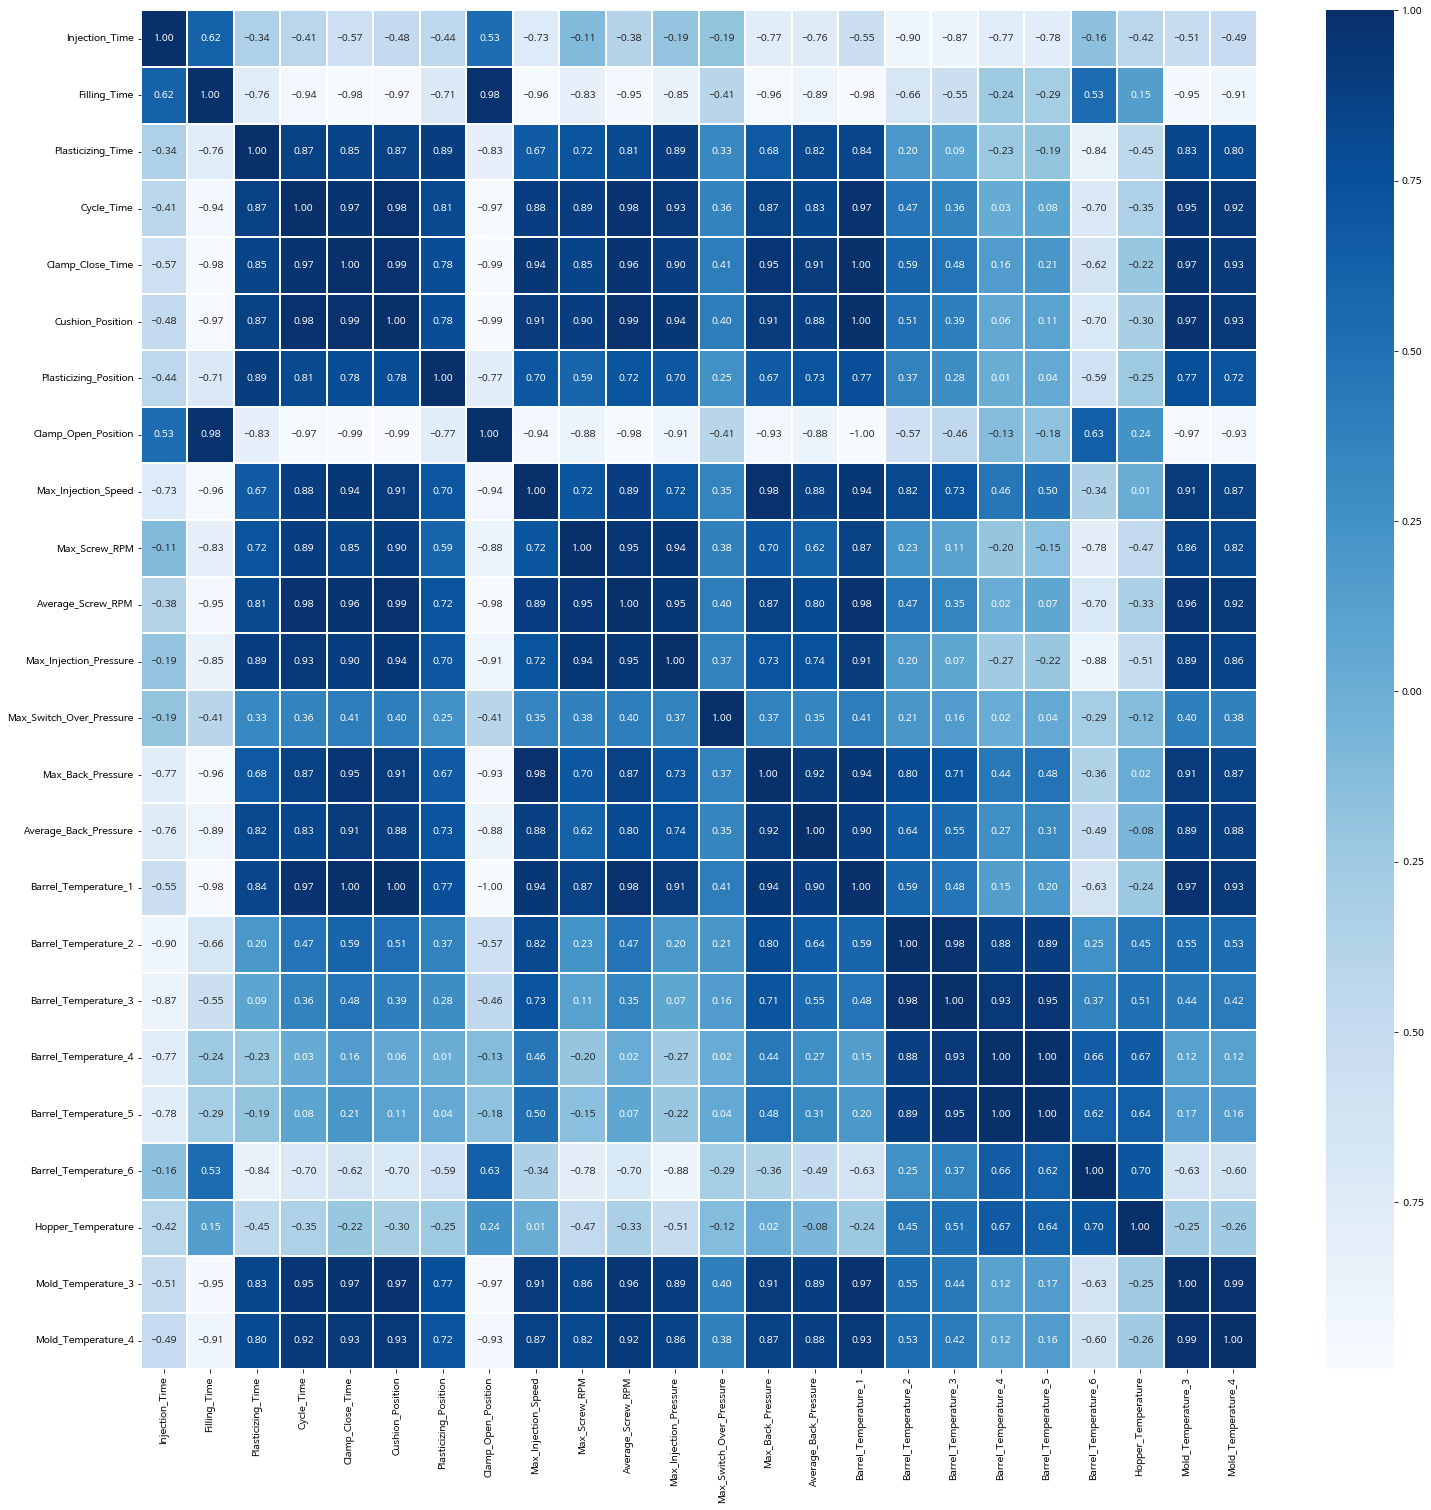

In [27]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_rg3.corr(), linewidths=0.1,annot=True, fmt ='.2f', cmap='Blues')
 #결과는 아래에서 확인 가능하다.

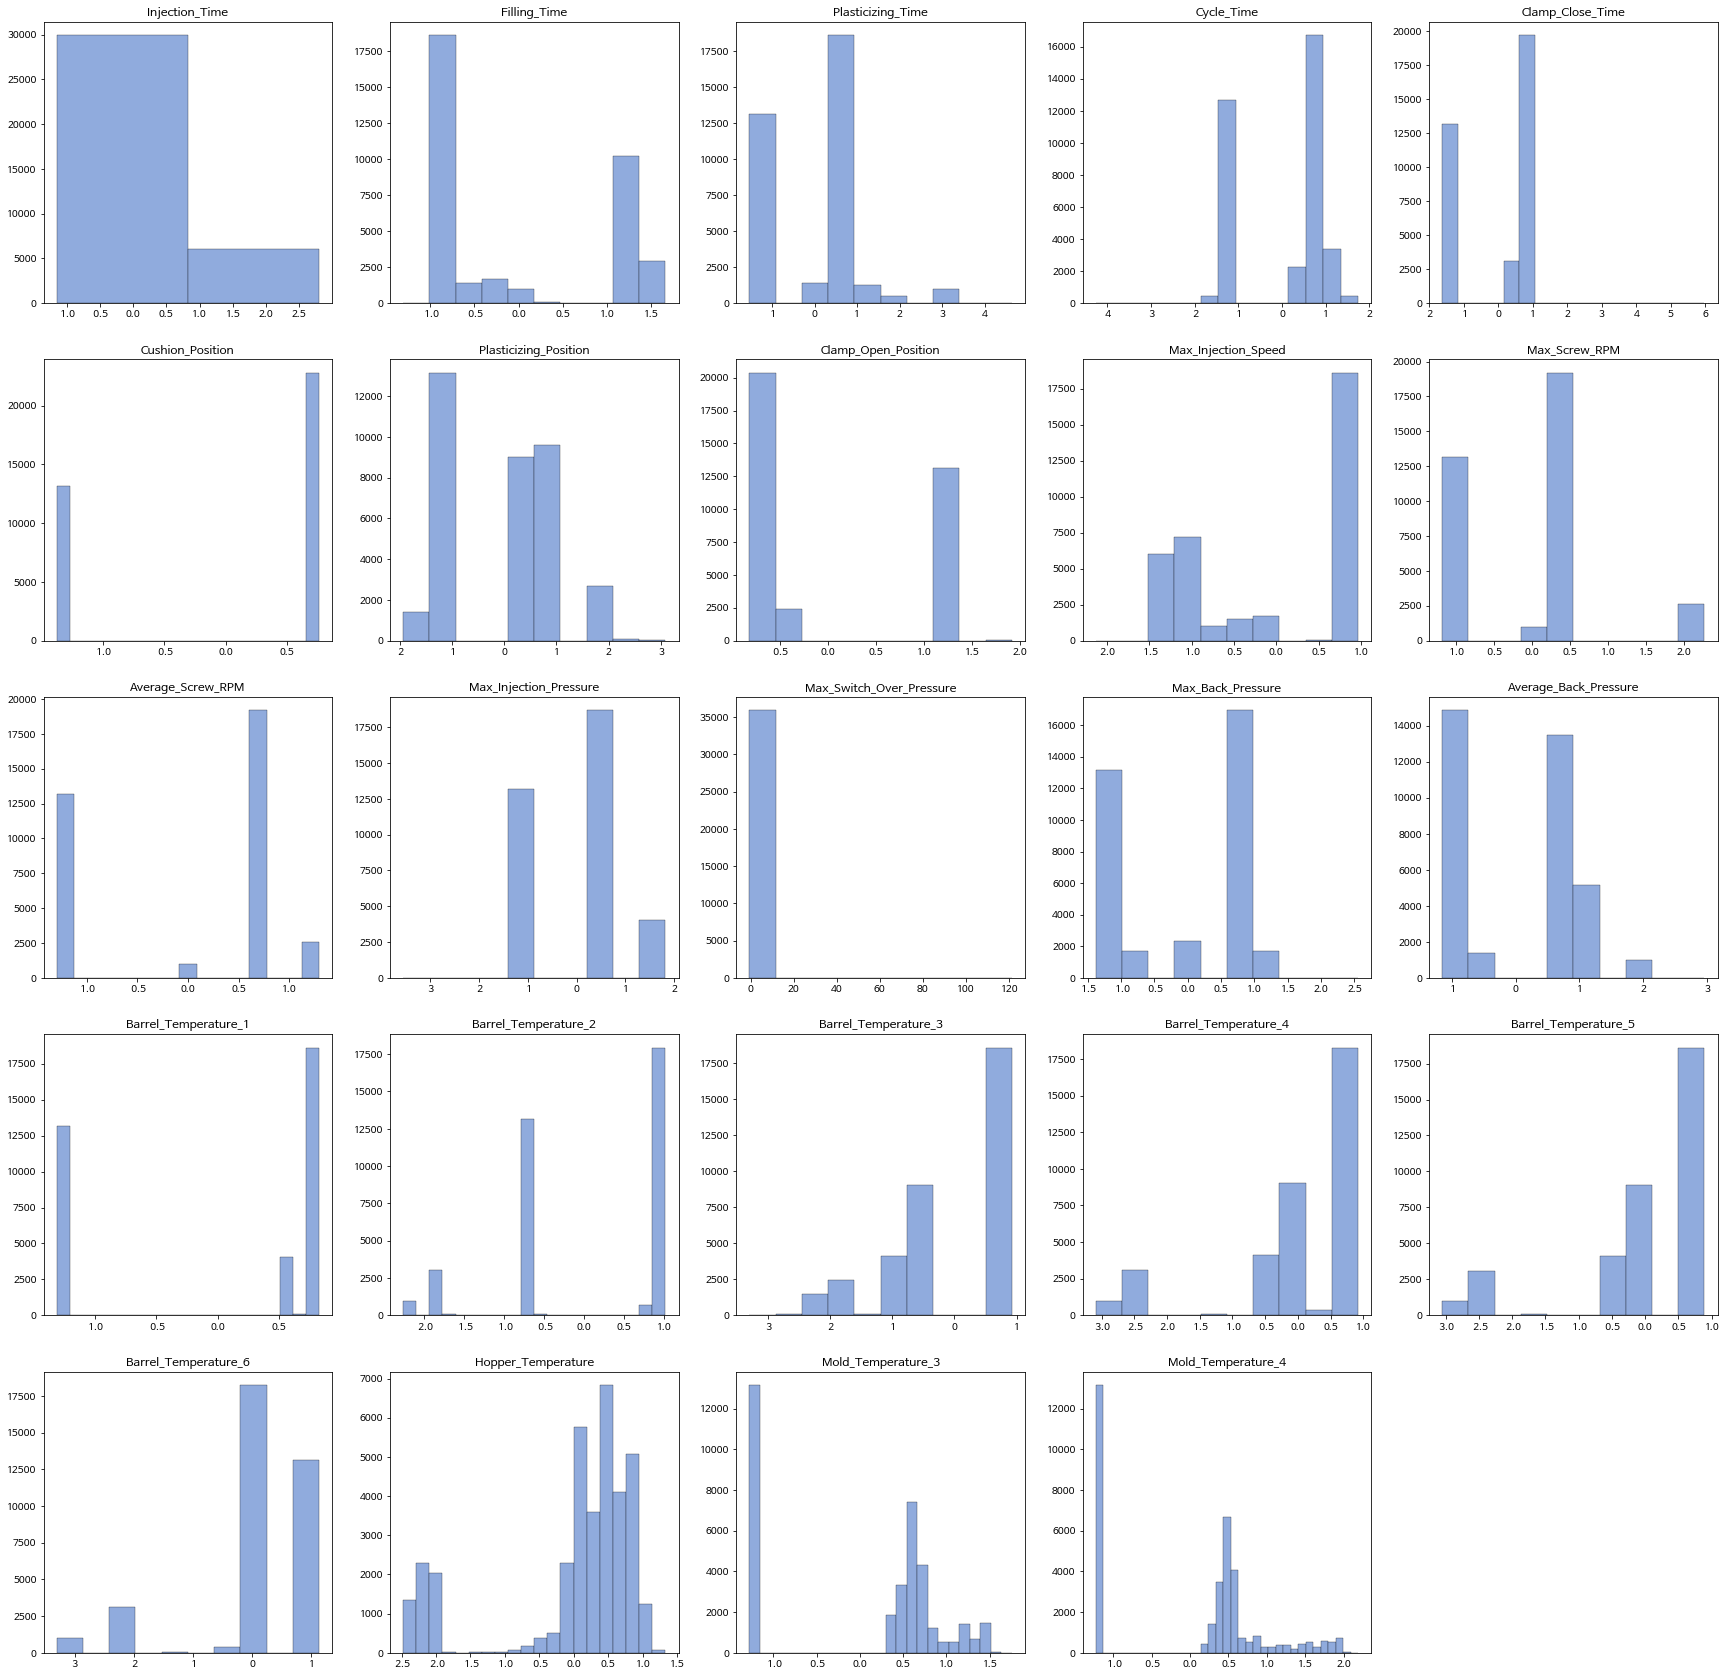

In [28]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(moldset_unlabeled_rg3):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(moldset_unlabeled_rg3[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)  #결과는 아래에서 확인 가능하다.

In [29]:
moldset_labeled_rg3['PassOrFail'] = moldset_labeled_rg3['PassOrFail'].map({0:int(0), 1:int(1)})
moldset_labeled_cn7['PassOrFail'] = moldset_labeled_cn7['PassOrFail'].map({0:int(0), 1:int(1)})

In [30]:
labeled_data = [moldset_labeled_cn7, moldset_labeled_rg3]
for d in labeled_data:
    print('양품 수: {}'.format(d[d['PassOrFail']==0].shape[0]))
    print('불량품 수: {}'.format(d[d['PassOrFail']==1].shape[0]))
    print('='*10) #결과는 아래에서 확인 가능하다.

양품 수: 1194
불량품 수: 17
양품 수: 1157
불량품 수: 25


In [31]:
from sklearn.preprocessing import StandardScaler

data = [moldset_labeled_cn7, moldset_labeled_rg3, moldset_unlabeled_cn7, moldset_unlabeled_rg3]
for d in data:
    for column in d.columns:
        if column !='PassOrFail':
            sc = StandardScaler()
            d[[column]] = sc.fit_transform(d[[column]])

In [32]:
moldset_labeled_cn7.to_csv(r'moldset_labeled_cn7.csv')
moldset_labeled_rg3.to_csv(r'moldset_labeled_rg3.csv')

In [33]:
moldset_unlabeled_cn7.to_csv(r'moldset_unlabeled_cn7.csv')
moldset_unlabeled_rg3.to_csv(r'moldset_unlabeled_rg3.csv')

In [34]:
def confident_prediction(df):
    result = []
    
    for i in range(len(df)):
        if df[i][0] >= df[i][1]:
            result.append(df[i][0])
        else:
            result.append(df[i][1])     
    return result

In [35]:
#심층 신경망에서 사용
def confident_prediction_1(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >=0.5:
            result.append(df[i])
        else:
            result.append(1-df[i])
    return result

In [36]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

def evaluation(y,y_pred):
    print("Accuracy: {:.2f}".format(accuracy_score(y,y_pred)))
    print("Precision: {:.2f}".format(precision_score(y,y_pred)))
    print("Recall: {:.2f}".format(recall_score(y,y_pred)))
    print(roc_auc_score(y,y_pred))
    print(f1_score(y,y_pred))
    print(confusion_matrix(y,y_pred))

In [37]:
class DataLoader():
    
    def __init__(self):
        #클래스 변수가 존재하는 데이터를 불러옴
        moldset_labeled = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
        moldset_labeled.drop(columns={'Unnamed: 0'}, inplace=True)
        #클래스 변수가 존재하지 않는 데이터를 불러옴
        moldset_unlabeled = pd.read_csv(r'./moldset_unlabeled_cn7.csv', low_memory=False, index_col=False)
        moldset_unlabeled.drop(columns={'Unnamed: 0'}, inplace=True)
        #평가 데이터의 비율을 test_size로 지정함
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
        for train_index, test_index in sss.split(moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'], moldset_labeled['PassOrFail']):
            moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[train_index]
            moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[test_index]
            moldset_labeled_train_Y = moldset_labeled['PassOrFail'].iloc[train_index]
            moldset_labeled_test_Y = moldset_labeled['PassOrFail'].iloc[test_index]
        #학습데이터
        self.moldset_labeled_train_X = moldset_labeled_train_X
        #평가데이터
        self. moldset_labeled_test_X =  moldset_labeled_test_X
        #학습데이터의 클래스 변수
        self.moldset_labeled_train_Y = moldset_labeled_train_Y
        #평가데이터의 클래스 변수
        self.moldset_labeled_test_Y = moldset_labeled_test_Y
        #클래스 변수가 없는 데이터
        self.moldset_unlabeled = moldset_unlabeled

In [38]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC
#탐색할 하이퍼 파라미터의 최대, 최소 범위를 설정한다.
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [i*1e-4 for i in range(1, 100)], 'C': [i*1e-4 for i in range(1, 100)]}]
scores = ['accuracy','precision', 'recall']
weights = {0:100.0, 1:1.0}
#층화추출법을 활용하여 클래스 별 비율이 유지되도록 한다.
kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
X = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
X.drop(columns={'Unnamed: 0'}, inplace=True)
y = X.pop('PassOrFail')
for score in scores:
    clf = GridSearchCV(SVC(class_weight=weights), scoring=score, param_grid=tuned_parameters, n_jobs=-1, cv=kf, refit=True, verbose=0)
    clf.fit(X, y)
	#최적의 하이퍼 파라미터 짝을 반환한다.
    print('Best Params: {}'.format(clf.best_params_))   #결과는 아래에서 확인 가능하다.

Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}


In [39]:
#7-1-1. 모델 학습 및 평가 함수 가이드
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled
    
	#남은 클래스 변수가 존재하지 않는 데이터의 개수
    num_left_unlabeled =int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    #7-1-2. 구현된 모델 불러오기 / 모델 정의 가이드
    while True:
        if without_label.shape[0] >= num_left_unlabeled:
			#클래스 별 데이터 비율
            weights = {0:100.0, 1:1.0}
			#최적의 하이퍼 파라미터 사용
            model = SVC(C=0.001, kernel='rbf', gamma=1e-2, class_weight=weights, probability=True, random_state=42)
            model.fit(X_with_label, Y_with_label)
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)

            #7-1-3. Unlabeled 데이터에 대한 예측
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction(prob)
            confident_prediction(prob)
            without_label['confidence'] = confident_prob
            
            #이 과정에서 내림차순 정렬
            without_label = without_label.sort_values(by=['confidence'], ascending=False)
            length = without_label.shape[0]
            cutting_index =int(length*(percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={'confidence'}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns={'confidence'})
            pseudo_label =  pd.DataFrame(model.predict(chosen_without_label))

   	    #7-1-4. Labeled 데이터와 통합 후 학습
            #데이터 업데이트
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
        else:
            print()
            print("ALL DONE, UNLABELED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            break   #결과는 아래에서 확인 가능하다.

In [40]:
train_and_evaluate()

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision:

In [41]:
def predict(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >=0.5:
            result.append(1)
        else:
            result.append(0)
    return result  

In [47]:
#8-1-1. Keras Package를 활용하여 학습에 필요한 변수 생성
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled
	#남은 클래스 변수가 존재하지 않는 데이터의 개수
    num_left_unlabeled =int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    #8-1-2. 신경망을 순차적으로 쌓음
    model = Sequential()
	#units은 출력 차원 수
    model.add(Dense(units=32, activation='relu', input_dim=24))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
    
    #8-1-3. 심층 신경망 모델을 이용하여 학습 진행하기
    for i in range(5):
        val_precision =0
        val_recall =0
        patience =10
        cnt =0

        for epoch in range(100):
            history = model.fit(X_with_label, Y_with_label, epochs=1, validation_split=0.3)
            history = history.history  
            if cnt>= patience:
                break
            if  history['val_precision'][0] >= val_precision and history['val_recall'][0] >= val_recall:
                val_precision = history['val_precision'][0]
                val_recall = history['val_recall'][0]
                cnt =0
            else:
                cnt+=1

        #8-1-4. 학습시킨 모델을 이용하여 목표값이 없는 데이터에 대한 예측 실행       
        prob = model.predict_proba(without_label)
        confident_prob = confident_prediction_1(prob)
        without_label['confidence'] = confident_prob
        without_label = without_label.sort_values(by=['confidence'], ascending=False)
        length = without_label.shape[0]
        cutting_index =int(length*(percentage*0.01))
        chosen_without_label = without_label.iloc[:cutting_index, :]
        chosen_without_label.drop(columns={'confidence'}, inplace=True)
        notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns={'confidence'})
        pseudo_label =  pd.DataFrame(predict(model.predict(chosen_without_label)))

        #8-1-5. UPDATE
        X_with_label = pd.concat([X_with_label, chosen_without_label])
        Y_with_label = pd.concat([Y_with_label, pseudo_label])
        without_label = notchosen_without_label
            
        
    print()
    print("ALL DONE, UNLABELED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
    model.save('NN_rg3.h5')

In [48]:
train_and_evaluate()

19/19 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 0.9983 - precision: 1.0000 - recall: 0.8889 - val_loss: 0.2386 - val_accuracy: 0.9804 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


96/96 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9980 - precision: 0.8000 - recall: 0.6667 - val_loss: 6.8839e-25 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


96/96 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9977 - precision: 0.6471 - recall: 0.9167 - val_loss: 3.4748e-31 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


165/165 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9991 - precision: 1.0000 - recall: 0.5833 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


228/228 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.9992 - precision: 0.6667 - recall: 1.0000 - val_loss: 3.3454e-07 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


284/284 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.9992 - precision: 0.6471 - recall: 0.9167 - val_loss: 3.8059e-09 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


284/284 [==============================] - 1s 5ms/step - loss: 9.1833e-04 - accuracy: 0.9991 - precision: 0.7500 - recall: 0.5000 - val_loss: 4.2251e-17 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


284/284 [==============================] - 1s 4ms/step - loss: 9.1574e-04 - accuracy: 0.9992 - precision: 0.6471 - recall: 0.9167 - val_loss: 6.0171e-29 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


284/284 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.9993 - precision: 0.7500 - recall: 0.7500 - val_loss: 1.7542e-31 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

ALL DONE, UNLABELED USED: 591%


In [49]:
from tensorflow.keras.models import load_model

data = DataLoader()
Y_test = data.moldset_labeled_test_Y
X_test = data.moldset_labeled_test_X

model = load_model('NN_rg3.h5')

Test Acc	: 0.9862637362637363 


Classfication_report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       359
           1       0.50      0.40      0.44         5

    accuracy                           0.99       364
   macro avg       0.75      0.70      0.72       364
weighted avg       0.98      0.99      0.99       364



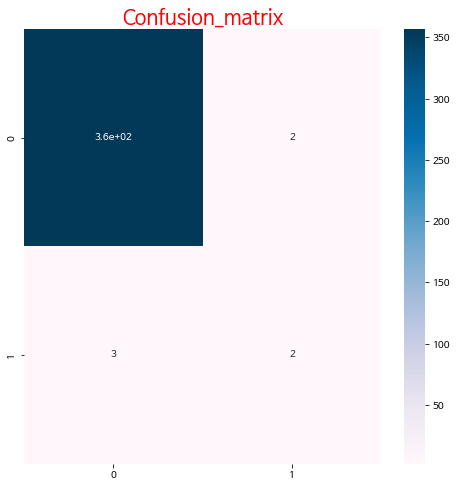

In [52]:
print(colored("Test Acc\t:","red"),accuracy_score(Y_test, y_pred),"\n\n")
print(colored("Classfication_report :\n", "red"), classification_report(Y_test, y_pred))
plt.figure(figsize=(8,8))
plt.title("Confusion_matrix", fontsize=20, color="red")
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap="PuBu");